# Class `Fuzzy_number` documentation

Here we present a short notebook about how the class `Fuzzy_number` was implemented, as well as its methods. The implementation utilized the book "IMECC, Coleçao. Tópicos de Lógica Fuzzy e Biomatemática" as guide. It is important to note that the implementation has no correlation with the authors of the book, so errors must not be taken to their account.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_number import Fuzzy_number

## Creating a fuzzy number

To create a fuzzy number, we first create an instance of the class `Fuzzy_number`, defining its closure and the number of alphalevels that will be used. After creating the instance, we can use methods, such as `.triangular()` to shape our fuzzy number into a triangular form.

Plots can be made using the atributes `.alphas` and `.alphalevels`, as shown below.

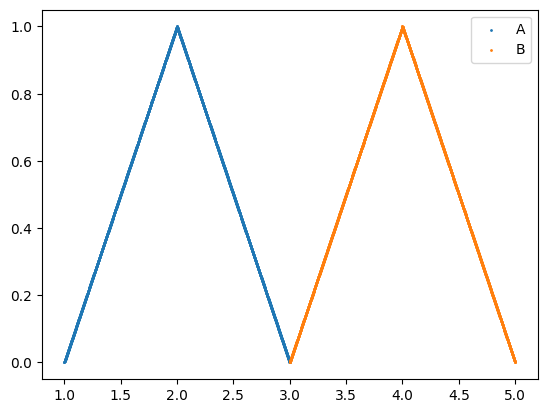

In [2]:
number_alphalevels = 1000

A = Fuzzy_number((1, 3), number_alphalevels)
B = Fuzzy_number((3, 5), number_alphalevels)

A.triangular(2)
B.triangular(4)

A_al, A_alphas = A.alphalevels, np.array([A.alphas, A.alphas])
B_al, B_alphas = B.alphalevels, np.array([B.alphas, B.alphas])

plt.scatter(A_al.T, A_alphas, s=1., label='A')
plt.scatter(B_al.T, B_alphas, s=1., label='B')
plt.legend()
plt.show()

## Operations with fuzzy numbers

Operations for fuzzy numbers are defined with the following Python operators:
- Addition: `+`
- Subtraction: `-`
- Multiplication by scalar: `*`
- Multiplication by fuzzy number: `@`
- Division by fuzzy number: `/`

Some examples of operations are shown below. Note that every operation results in another instance of the class `Fuzzy_number`, for completeness of the code.

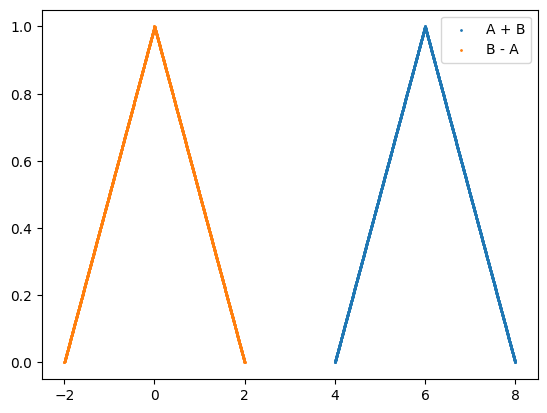

In [3]:
C = A + B
D = B - A

x1, y1 = C.alphalevels, np.array([C.alphas, C.alphas])
x2, y2 = D.alphalevels, np.array([D.alphas, D.alphas])

plt.scatter(x1.T, y1, s=1., label='A + B')
plt.scatter(x2.T, y2, s=1., label='B - A')
plt.legend()
plt.show()

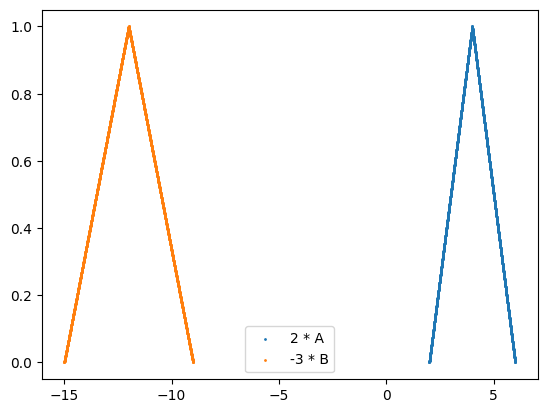

In [4]:
F = 2 * A 
G = -3 * B

x3, y3 = F.alphalevels, np.array([F.alphas, F.alphas])
x4, y4 = G.alphalevels, np.array([G.alphas, G.alphas])

plt.scatter(x3.T, y3, s=1., label='2 * A')
plt.scatter(x4.T, y4, s=1., label='-3 * B')
plt.legend()
plt.show()

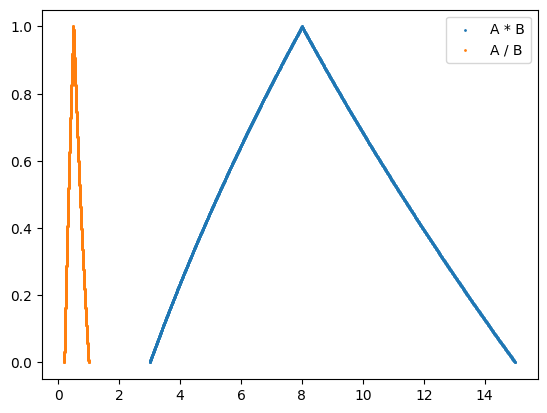

In [5]:
H = A @ B
I = A / B

x5, y5 = H.alphalevels, np.array([H.alphas, H.alphas])
x6, y6 = I.alphalevels, np.array([I.alphas, I.alphas])

plt.scatter(x5.T, y5, s=1., label='A * B')
plt.scatter(x6.T, y6, s=1., label='A / B')
plt.legend()
plt.show()

## Shapes of fuzzy numbers

Fuzzy numbers in this implementation can assume the following shapes: 
- Triangular
- Trapezoidal
- Parabola
- Gaussian

The parameters for each one of them are defined in the `fuzzy_number.py` file. We show examples of them below.

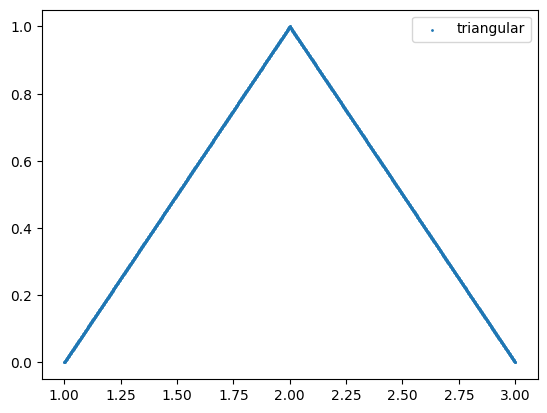

In [6]:
number_alphalevels = 1000

triangular = Fuzzy_number((1, 3), number_alphalevels)

triangular.triangular(2)

triangular_al, triangular_alphas = triangular.alphalevels, np.array([triangular.alphas, triangular.alphas])

plt.scatter(triangular_al.T, triangular_alphas, s=1., label='triangular')
plt.legend()
plt.show()

Note that, for the case of trapezoidal numbers, we need a aditional code line for the plot, because the alpha level of $\alpha = 1$ needs to be visually filled, this being only for visual purpose.  

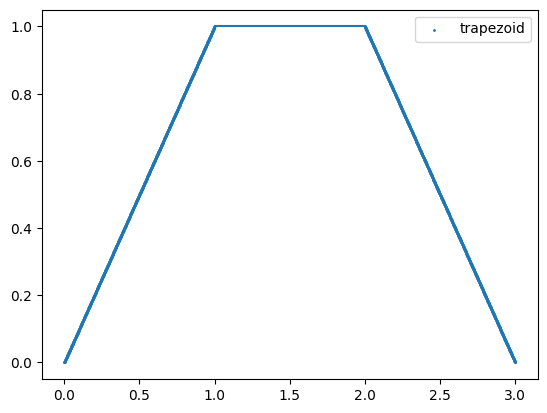

In [7]:
trapezoid = Fuzzy_number((0, 3), number_alphalevels)

trapezoid.trapezoidal(1, 2)

trapezoid_al, trapezoid_alphas = trapezoid.alphalevels, np.array([trapezoid.alphas, trapezoid.alphas])

plt.scatter(trapezoid_al.T, trapezoid_alphas, s=1., label='trapezoid')
plt.plot((trapezoid_al[-1][0], trapezoid_al[-1][1]), (1, 1))
plt.legend()
plt.show()

The quadratic numbers may also need the aditional line code for plots, depending on the quadratic parameter used. 

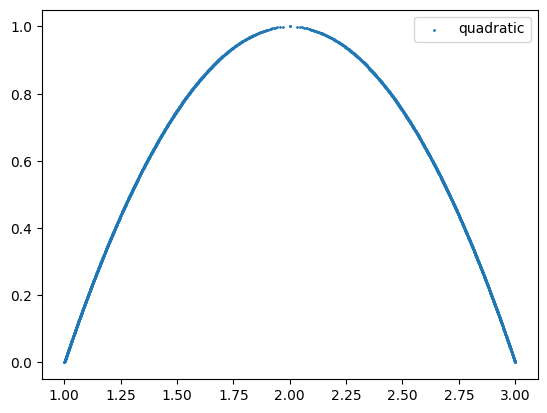

In [8]:
quadratic = Fuzzy_number((1, 3), number_alphalevels)

quadratic.quadratic(-1)

quadratic_al, quadratic_alphas = quadratic.alphalevels, np.array([quadratic.alphas, quadratic.alphas])

plt.scatter(quadratic_al.T, quadratic_alphas, s=1., label='quadratic')
#plt.plot((quadratic_al[-1][0], quadratic_al[-1][1]), (1, 1))
plt.legend()
plt.show()

With the gaussian numbers, the issue are the alpha levels below a certain threshold, which yields in vertical lines in the graphic, but again, this is only a visual feature.

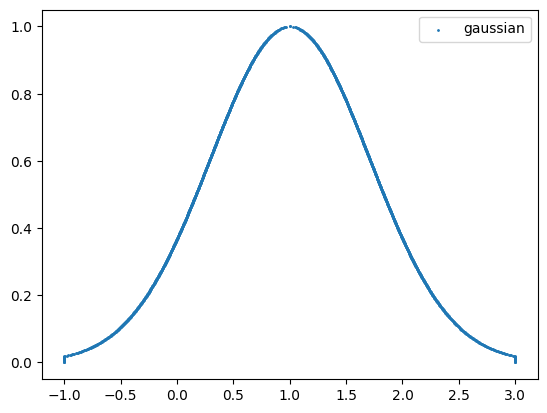

In [9]:
gaussian = Fuzzy_number((1, 3), number_alphalevels)

gaussian.gaussian(1)

gaussian_al, gaussian_alphas = gaussian.alphalevels, np.array([gaussian.alphas, gaussian.alphas])

plt.scatter(gaussian_al.T, gaussian_alphas, s=1., label='gaussian')
plt.legend()
plt.show()

In [10]:
quadratic = Fuzzy_number((0,1), number_alphalevels)
quadratic.quadratic(-4, 4, 0)

x, y = quadratic.alphalevels, np.array([quadratic.alphas, quadratic.alphas]) 
plt.scatter(x.T, y, s=1.0)    
plt.show()

TypeError: Fuzzy_number.quadratic() takes 2 positional arguments but 4 were given

In [ ]:
def triangular_al(a1, b1, a2, b2, points=1000, alpha=(0, 1)):
    alpha_min, alpha_max = alpha[0], alpha[1]  
    alpha_interval = np.linspace(alpha_min, alpha_max, points)
    
    if a1 == 0 and b1 == 0:
        alphalevels = [((alpha - b2) / a2) for alpha in alpha_interval]
        return np.array(alphalevels), np.array(alpha_interval)
    
    if a2 == 0 and b2 == 0:
        alphalevels = [((alpha - b1) / a1) for alpha in alpha_interval]
        return np.array(alphalevels), np.array(alpha_interval)
    
    alphalevels = [[((alpha - b1) / a1), ((alpha - b2) / a2)] for alpha in alpha_interval]
    return np.array(alphalevels), np.array([alpha_interval, alpha_interval])

In [ ]:
def constant_al(c, a, b, points=1000):
    alpha_interval = [c for _ in range(points)]
    alphalevels = np.linspace(a, b, points)
    return np.array(alphalevels), np.array(alpha_interval)

In [ ]:
alphalevel1, y1 = constant_al(0.5, 0, 2)
alphalevel2, y2 = constant_al(1, 2, 10)
alphalevel3, y3 = triangular_al(0, 0, -0.2, 3)

plt.scatter(alphalevel1, y1, s=1.0, color='k')
plt.scatter(alphalevel2, y2, s=1.0, color='k')
plt.scatter(alphalevel3, y3, s=1.0, color='k')
plt.show()